In [1]:
import numpy as np
import pandas as pd 

In [2]:
temp = pd.read_csv('GlobalLandTemperaturesByState.csv')
temp

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [3]:
temp = temp[temp.State == 'California']

In [4]:
temp = temp[['dt', 'AverageTemperature']]

In [5]:
cd = temp.copy()
cd['dt'] = temp.dt.apply(lambda x: str(x)[:-3])
cd.plot()
def func(x):
    if int(x[:4]) >= 1900:
        return True
    else:
        return False

In [6]:
final_temp = cd[cd.dt.apply(func)]
temp = final_temp.copy()
temp['year'] = temp.dt.apply(lambda x: x.split('-')[0])
temp['month'] = temp.dt.apply(lambda x: x.split('-')[1])
temp['temp']= temp.AverageTemperature

temp = temp[['year', 'month', 'temp']]
temp.reset_index()

,index,year,month,temp
0,71670,1900,01,7.876
1,71671,1900,02,8.640
2,71672,1900,03,12.203
3,71673,1900,04,11.405
4,71674,1900,05,17.085
...,...,...,...,...
1360,73030,2013,05,17.899
1361,73031,2013,06,22.513
1362,73032,2013,07,25.563
1363,73033,2013,08,23.460


In [7]:
temp = temp[temp.year != '2013']
temp

,year,month,temp
71670,1900,01,7.876
71671,1900,02,8.640
71672,1900,03,12.203
71673,1900,04,11.405
71674,1900,05,17.085
...,...,...,...
73021,2012,08,25.407
73022,2012,09,22.760
73023,2012,10,16.638
73024,2012,11,11.475


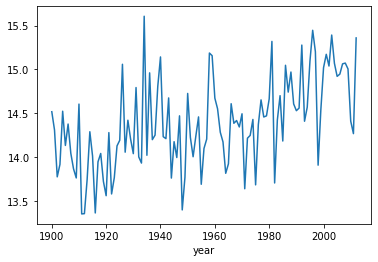

In [8]:
temp.groupby('year')['temp'].mean().plot()

In [9]:
temp = temp.reset_index()
temp = temp[['year', 'month','temp']]

In [10]:
temp.to_csv('temp.csv', index=False)

In [11]:
years = [str(i) for i in range(1900, 2012)]

In [12]:
year_avg = temp.groupby('year')['temp'].mean()
[round(i, 2) for i in year_avg]

[14.52,
 14.31,
 13.77,
 13.91,
 14.52,
 14.13,
 14.38,
 14.04,
 13.86,
 13.76,
 14.6,
 13.35,
 13.35,
 13.74,
 14.29,
 14.01,
 13.36,
 13.94,
 14.04,
 13.72,
 13.56,
 14.28,
 13.58,
 13.76,
 14.13,
 14.19,
 15.06,
 14.05,
 14.42,
 14.2,
 14.04,
 14.79,
 14.0,
 13.93,
 15.61,
 14.02,
 14.96,
 14.2,
 14.25,
 14.81,
 15.14,
 14.23,
 14.21,
 14.67,
 13.76,
 14.17,
 13.99,
 14.47,
 13.39,
 13.77,
 14.72,
 14.22,
 14.0,
 14.24,
 14.46,
 13.69,
 14.1,
 14.2,
 15.19,
 15.16,
 14.67,
 14.55,
 14.28,
 14.17,
 13.81,
 13.92,
 14.61,
 14.38,
 14.42,
 14.34,
 14.49,
 13.64,
 14.21,
 14.25,
 14.43,
 13.68,
 14.37,
 14.65,
 14.46,
 14.47,
 14.66,
 15.32,
 13.7,
 14.42,
 14.7,
 14.18,
 15.05,
 14.74,
 14.97,
 14.6,
 14.53,
 14.56,
 15.28,
 14.41,
 14.57,
 15.09,
 15.45,
 15.2,
 13.91,
 14.54,
 15.02,
 15.17,
 15.04,
 15.39,
 15.07,
 14.92,
 14.95,
 15.06,
 15.07,
 15.0,
 14.41,
 14.27,
 15.36]

In [13]:
def summer(x):
    if x == '06' or x == '07' or x == '08':
        return True
    else:
        return False
summer_year_avg = temp[temp.month.apply(summer)].groupby('year')['temp'].mean()
[round(i, 2) for i in summer_year_avg]

[22.06,
 22.31,
 21.89,
 22.01,
 22.46,
 22.02,
 22.51,
 21.07,
 22.13,
 21.75,
 22.12,
 21.72,
 21.09,
 21.72,
 21.75,
 22.15,
 21.24,
 22.99,
 22.74,
 22.41,
 21.92,
 22.43,
 22.63,
 20.91,
 22.19,
 22.16,
 23.06,
 22.17,
 22.17,
 22.55,
 22.31,
 23.48,
 22.11,
 22.77,
 22.34,
 22.65,
 23.18,
 22.9,
 22.62,
 22.81,
 23.15,
 21.63,
 22.65,
 21.39,
 21.06,
 22.52,
 22.38,
 21.57,
 21.55,
 22.16,
 22.42,
 22.27,
 21.9,
 21.64,
 21.68,
 21.83,
 21.93,
 22.69,
 22.93,
 23.51,
 23.71,
 23.82,
 22.19,
 21.37,
 22.07,
 21.45,
 22.5,
 23.09,
 22.3,
 22.59,
 23.09,
 22.73,
 23.05,
 22.83,
 22.78,
 21.92,
 21.75,
 23.25,
 22.59,
 22.33,
 21.98,
 23.82,
 21.81,
 21.84,
 23.03,
 23.44,
 23.03,
 22.33,
 23.09,
 22.46,
 22.94,
 22.01,
 22.88,
 21.86,
 23.58,
 22.21,
 24.0,
 22.59,
 22.77,
 21.89,
 23.18,
 23.31,
 23.53,
 23.9,
 23.24,
 23.07,
 24.18,
 23.62,
 23.74,
 22.97,
 22.72,
 22.33,
 23.32]

In [14]:
def winter(x):
    if x == '12' or x == '01' or x == '02':
        return True
    else:
        return False
winter_year_avg = temp[temp.month.apply(winter)].groupby('year')['temp'].mean()
[round(i, 2) for i in winter_year_avg]

[7.83,
 6.86,
 6.61,
 5.6,
 6.62,
 7.02,
 7.67,
 7.54,
 6.17,
 6.29,
 6.06,
 5.4,
 6.94,
 5.41,
 6.31,
 6.38,
 5.62,
 6.0,
 6.05,
 5.91,
 6.8,
 6.94,
 5.26,
 6.11,
 6.67,
 7.6,
 6.71,
 6.65,
 6.62,
 6.43,
 6.58,
 6.66,
 4.63,
 5.1,
 8.1,
 6.86,
 6.81,
 4.92,
 7.23,
 6.65,
 8.08,
 7.8,
 6.73,
 7.37,
 6.38,
 6.75,
 6.38,
 6.68,
 5.91,
 3.72,
 7.01,
 6.15,
 5.77,
 7.76,
 7.22,
 5.71,
 6.39,
 6.85,
 8.6,
 7.22,
 6.08,
 7.22,
 6.63,
 7.56,
 6.48,
 6.55,
 5.94,
 6.49,
 6.88,
 6.49,
 7.31,
 5.89,
 5.7,
 6.71,
 6.16,
 6.66,
 7.23,
 7.9,
 6.74,
 6.32,
 8.59,
 8.48,
 6.39,
 7.63,
 6.77,
 6.35,
 8.48,
 6.13,
 7.05,
 6.04,
 5.33,
 7.95,
 6.89,
 6.12,
 6.63,
 8.67,
 8.22,
 7.03,
 6.51,
 7.33,
 8.13,
 6.06,
 7.27,
 8.23,
 6.89,
 7.77,
 7.56,
 6.31,
 6.22,
 7.09,
 7.77,
 6.72,
 7.42]

In [15]:
[[int(years[i]), round(summer_year_avg[i],2)] for i in range(len(years))]

[[1900, 22.06],
 [1901, 22.31],
 [1902, 21.89],
 [1903, 22.01],
 [1904, 22.46],
 [1905, 22.02],
 [1906, 22.51],
 [1907, 21.07],
 [1908, 22.13],
 [1909, 21.75],
 [1910, 22.12],
 [1911, 21.72],
 [1912, 21.09],
 [1913, 21.72],
 [1914, 21.74],
 [1915, 22.15],
 [1916, 21.24],
 [1917, 22.99],
 [1918, 22.74],
 [1919, 22.41],
 [1920, 21.92],
 [1921, 22.43],
 [1922, 22.63],
 [1923, 20.91],
 [1924, 22.19],
 [1925, 22.16],
 [1926, 23.06],
 [1927, 22.17],
 [1928, 22.17],
 [1929, 22.55],
 [1930, 22.31],
 [1931, 23.48],
 [1932, 22.11],
 [1933, 22.77],
 [1934, 22.34],
 [1935, 22.65],
 [1936, 23.18],
 [1937, 22.9],
 [1938, 22.62],
 [1939, 22.81],
 [1940, 23.15],
 [1941, 21.63],
 [1942, 22.65],
 [1943, 21.39],
 [1944, 21.06],
 [1945, 22.52],
 [1946, 22.38],
 [1947, 21.57],
 [1948, 21.55],
 [1949, 22.16],
 [1950, 22.42],
 [1951, 22.27],
 [1952, 21.9],
 [1953, 21.64],
 [1954, 21.68],
 [1955, 21.83],
 [1956, 21.93],
 [1957, 22.69],
 [1958, 22.93],
 [1959, 23.51],
 [1960, 23.71],
 [1961, 23.82],
 [1962, 22

In [16]:
pd.DataFrame([[int(years[i]), round(summer_year_avg[i],2)] for i in range(len(years))]).to_csv('summer.csv', index=False)

In [17]:
[[int(years[i]), round(winter_year_avg[i],2)] for i in range(len(years))]

[[1900, 7.83],
 [1901, 6.86],
 [1902, 6.61],
 [1903, 5.6],
 [1904, 6.62],
 [1905, 7.02],
 [1906, 7.67],
 [1907, 7.54],
 [1908, 6.17],
 [1909, 6.29],
 [1910, 6.06],
 [1911, 5.4],
 [1912, 6.94],
 [1913, 5.41],
 [1914, 6.31],
 [1915, 6.38],
 [1916, 5.62],
 [1917, 6.0],
 [1918, 6.05],
 [1919, 5.91],
 [1920, 6.8],
 [1921, 6.94],
 [1922, 5.26],
 [1923, 6.11],
 [1924, 6.67],
 [1925, 7.6],
 [1926, 6.71],
 [1927, 6.65],
 [1928, 6.62],
 [1929, 6.43],
 [1930, 6.58],
 [1931, 6.66],
 [1932, 4.63],
 [1933, 5.1],
 [1934, 8.1],
 [1935, 6.86],
 [1936, 6.81],
 [1937, 4.92],
 [1938, 7.23],
 [1939, 6.65],
 [1940, 8.08],
 [1941, 7.8],
 [1942, 6.73],
 [1943, 7.37],
 [1944, 6.38],
 [1945, 6.75],
 [1946, 6.38],
 [1947, 6.68],
 [1948, 5.91],
 [1949, 3.72],
 [1950, 7.01],
 [1951, 6.15],
 [1952, 5.77],
 [1953, 7.76],
 [1954, 7.22],
 [1955, 5.71],
 [1956, 6.39],
 [1957, 6.85],
 [1958, 8.6],
 [1959, 7.22],
 [1960, 6.08],
 [1961, 7.22],
 [1962, 6.63],
 [1963, 7.56],
 [1964, 6.48],
 [1965, 6.55],
 [1966, 5.94],
 [19

In [18]:
pd.DataFrame([[int(years[i]), round(winter_year_avg[i],2)] for i in range(len(years))]).to_csv('winter.csv', index=False)

In [19]:
[[int(years[i]), round(year_avg[i],2)] for i in range(len(years))]

[[1900, 14.52],
 [1901, 14.31],
 [1902, 13.77],
 [1903, 13.91],
 [1904, 14.52],
 [1905, 14.13],
 [1906, 14.38],
 [1907, 14.04],
 [1908, 13.86],
 [1909, 13.76],
 [1910, 14.6],
 [1911, 13.35],
 [1912, 13.35],
 [1913, 13.74],
 [1914, 14.29],
 [1915, 14.01],
 [1916, 13.36],
 [1917, 13.94],
 [1918, 14.04],
 [1919, 13.72],
 [1920, 13.56],
 [1921, 14.28],
 [1922, 13.58],
 [1923, 13.76],
 [1924, 14.13],
 [1925, 14.19],
 [1926, 15.06],
 [1927, 14.05],
 [1928, 14.42],
 [1929, 14.2],
 [1930, 14.04],
 [1931, 14.79],
 [1932, 14.0],
 [1933, 13.93],
 [1934, 15.61],
 [1935, 14.02],
 [1936, 14.96],
 [1937, 14.2],
 [1938, 14.25],
 [1939, 14.81],
 [1940, 15.14],
 [1941, 14.23],
 [1942, 14.21],
 [1943, 14.67],
 [1944, 13.76],
 [1945, 14.17],
 [1946, 13.99],
 [1947, 14.47],
 [1948, 13.39],
 [1949, 13.77],
 [1950, 14.72],
 [1951, 14.22],
 [1952, 14.0],
 [1953, 14.24],
 [1954, 14.46],
 [1955, 13.69],
 [1956, 14.1],
 [1957, 14.2],
 [1958, 15.19],
 [1959, 15.16],
 [1960, 14.67],
 [1961, 14.55],
 [1962, 14.28],

In [26]:
pd.DataFrame([[int(years[i]), round(year_avg[i],2)] for i in range(len(years))]).to_csv('year.csv', index=False)